# DEALING WITH BIASED DATA

In [1]:
import pandas as pd
data=pd.read_csv('/Users/nirbhaysedha/Documents/MACHINE_LEARNING_100DAYS/datasets/titanic_dataset.csv')

In [2]:
from sklearn.preprocessing import OneHotEncoder

In [3]:
from sklearn.compose import ColumnTransformer

In [4]:
from sklearn.impute import SimpleImputer

In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data.drop(columns=['Name','Ticket','Cabin','Embarked'],inplace=True)

In [7]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test=train_test_split(data.drop(columns=['Survived']),data['Survived'],test_size=0.2)

In [10]:
x_train.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age            138
SibSp            0
Parch            0
Fare             0
dtype: int64

In [11]:
x_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
474,475,3,female,22.0,0,0,9.8375
580,581,2,female,25.0,1,1,30.0000
404,405,3,female,20.0,0,0,8.6625
840,841,3,male,20.0,0,0,7.9250
443,444,2,female,28.0,0,0,13.0000


In [12]:
print(" checking the skewness in features of our dataset")
print(f"skewness in age {data['Age'].skew()}")
print(f"skewness in fare {data['Fare'].skew()}")

 checking the skewness in features of our dataset
skewness in age 0.38910778230082704
skewness in fare 4.787316519674893


# RIGHT SKEWNES

/Users/nirbhaysedha/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


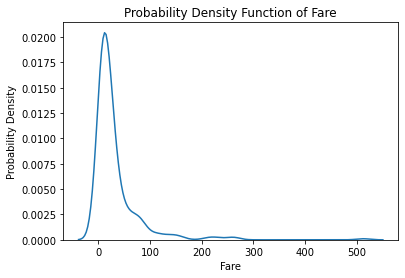

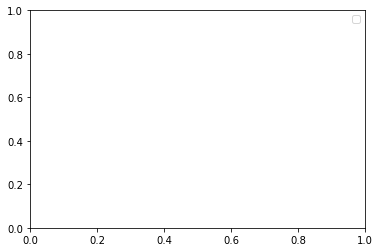

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

fare_column = data['Fare']

sns.distplot(fare_column, hist=False, kde=True)

plt.xlabel('Fare')
plt.ylabel('Probability Density')
plt.title('Probability Density Function of Fare')

plt.show()

In [14]:
print("so to overcome this situation we transform this feature and make it normally distributed")

so to overcome this situation we transform this feature and make it normally distributed


In [15]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np

In [16]:
Feature_transformer=ColumnTransformer([('first',SimpleImputer(),[3]),
                                      ('Second',OneHotEncoder(),[2])],
                                     remainder='passthrough')


In [17]:
x_train_transformed=Feature_transformer.fit_transform(x_train)
x_test_transformed=Feature_transformer.transform(x_test)

# FUNCTION TRANSFORMER

In [18]:
trf=FunctionTransformer(func=np.log1p)

In [19]:
x_train_data=trf.fit_transform(x_train_transformed)
x_test_data=trf.transform(x_test_transformed)

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [22]:
LOGISTIC_MODEL=LogisticRegression()
DECISION_MODEL=DecisionTreeClassifier()

In [23]:
LOGISTIC_MODEL.fit(x_train_data,y_train)
DECISION_MODEL.fit(x_train_data,y_train)

DecisionTreeClassifier()

In [24]:
y_prediction_log=LOGISTIC_MODEL.predict(x_test_data)
y_prediction_dec=DECISION_MODEL.predict(x_test_data)

In [25]:
from sklearn.metrics import accuracy_score
print(f"the accuracy of Logistic Regression is {accuracy_score(y_test,y_prediction_log)*100}%")
print(f"the accuracy of Decision Tree is {accuracy_score(y_test,y_prediction_dec)*100}%")

the accuracy of Logistic Regression is 83.24022346368714%
the accuracy of Decision Tree is 79.88826815642457%
